# Лабораторная работа №3

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sympy import Matrix, Symbol

## Часть 1

Функция Розенброка

In [2]:
def f(x):
    return (1 - x[1]) ** 2 + 100 * (x[0] - x[1] ** 2) ** 2

In [3]:
f([Symbol('x'), Symbol('y')])

(1 - y)**2 + 100*(x - y**2)**2

Градиент функции Розенброка

In [4]:
def grad(x):
    return np.array([200 * (x[0] - x[1] ** 2), -2 * (1 - x[1]) - 400 * x[1] * (x[0] - x[1] ** 2)])

In [5]:
Matrix(grad([Symbol('x'), Symbol('y')]))

Matrix([
[           200*x - 200*y**2],
[-400*y*(x - y**2) + 2*y - 2]])

Гессиан функции Розенброка

In [6]:
def hess(x):
    return np.array([[200, -400 * x[1]], [-400 * x[1], 2 - 400 * (x[0] - x[1] ** 2) + 800 * x[1] ** 2]])

In [7]:
Matrix(hess([Symbol('x'), Symbol('y')]))

Matrix([
[   200,                 -400*y],
[-400*y, -400*x + 1200*y**2 + 2]])

Метод Ньютона

In [8]:
x = np.array([-0.5, 0.5])
err = np.inf
k = 0
err_newton = []
while err > 0.01:
    p = -np.linalg.inv(hess(x)) @ grad(x)
    x = x + p
    err = np.linalg.norm(x - np.array([1, 1]))
    err_newton.append(err)
    k += 1

In [9]:
Matrix(x)

Matrix([
[0.997870900785721],
[0.998934883391222]])

In [10]:
k

3

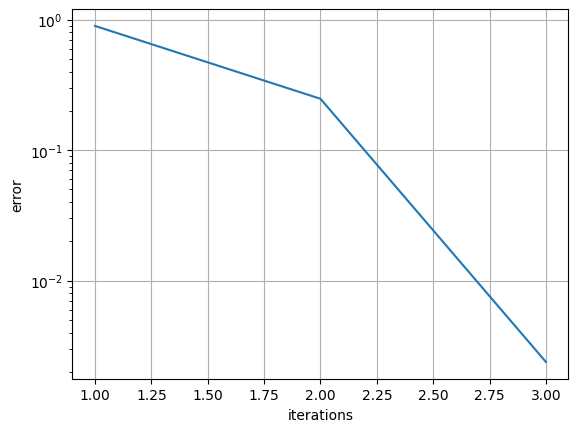

In [11]:
plt.semilogy(range(1, len(err_newton) + 1), err_newton, label = 'Newton')
plt.xlabel('iterations')
plt.ylabel('error')
plt.grid(True)

## Часть 2

Метод Ньютона с постоянным Гессианом

In [12]:
x = np.array([-0.5, 0.5])
H0 = np.linalg.inv(hess(x))
err = np.inf
k = 0
err_newton_h0 = []
while err > 0.01:
    p = -H0 @ grad(x)
    x = x + p
    err = np.linalg.norm(x - np.array([1, 1]))
    err_newton_h0.append(err)
    k += 1 

In [13]:
Matrix(x)

Matrix([
[0.991077324342581],
[0.995537600034057]])

In [14]:
k

1035

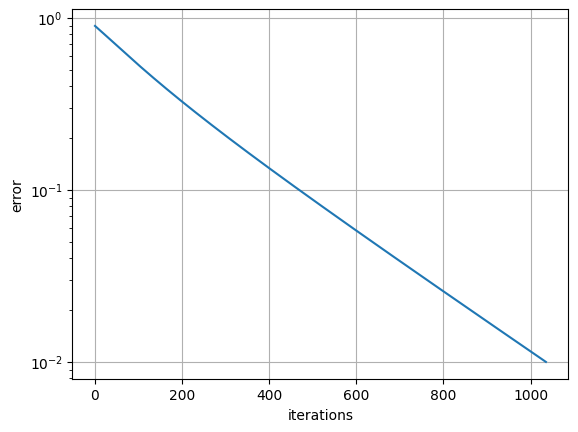

In [15]:
plt.semilogy(range(1, len(err_newton_h0) + 1), err_newton_h0, label = 'Newton H0')
plt.xlabel('iterations')
plt.ylabel('error')
plt.grid(True)

## Часть 3

Демпфированный метод Ньютона

In [16]:
x = np.array([-0.5, 0.5])
err = np.inf
k = 0
err_newton_dempf = []
while err > 0.01:
    p = -np.linalg.inv(hess(x)) @ grad(x)
    a = sp.optimize.line_search(f, grad, x, p)[0]
    x = x + a * p
    err = np.linalg.norm(x - np.array([1, 1]))
    err_newton_dempf.append(err)
    k += 1

In [17]:
Matrix(x)

Matrix([
[0.999030437972389],
[0.999528256509419]])

In [18]:
k

9

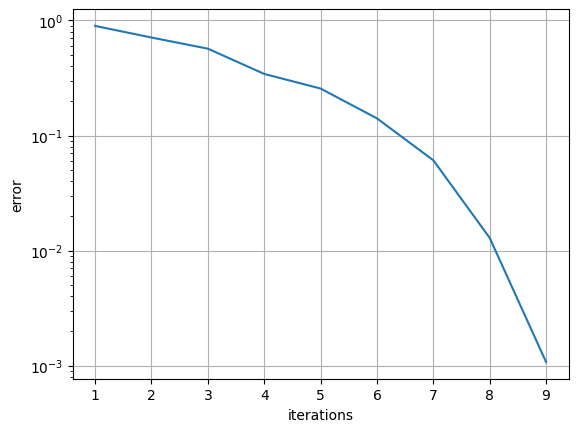

In [19]:
plt.semilogy(range(1, len(err_newton_dempf) + 1), err_newton_dempf, label = 'Newton dempf')
plt.xlabel('iterations')
plt.ylabel('error')
plt.grid(True)

## Часть 4

In [20]:
x = np.array([-0.5, 0.5])
B = np.eye(2)
g = grad(x)
err = np.inf
k = 0
err_broyden = []
while err > 0.01:
    p = -B @ g
    a = sp.optimize.line_search(f, grad, x, p)[0]
    s = a * p
    x = x + s
    y = grad(x) - g
    g = grad(x)
    ro = 1.0 / (y @ s)
    A1 = np.eye(2) - ro * s[:, np.newaxis] * y[np.newaxis, :]
    A2 = np.eye(2) - ro * y[:, np.newaxis] * s[np.newaxis, :]
    B = np.dot(A1, np.dot(B, A2)) + (ro * s[:, np.newaxis] *
                                                 s[np.newaxis, :])
    err = np.linalg.norm(x - np.array([1, 1]))
    err_broyden.append(err)
    k += 1

In [21]:
Matrix(x)

Matrix([
[0.995290338376153],
[0.998122790161653]])

In [22]:
k

27

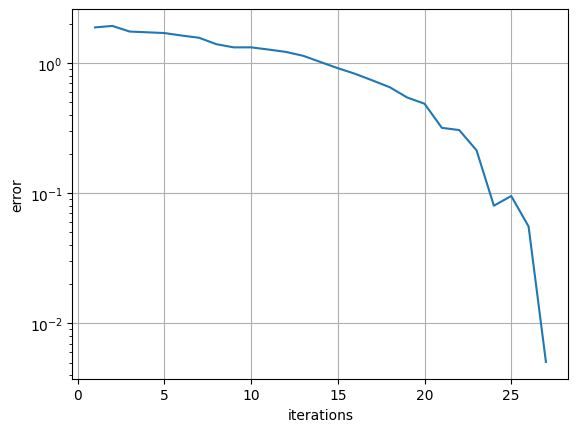

In [23]:
plt.semilogy(range(1, len(err_broyden) + 1), err_broyden, label = 'quasi-Newton')
plt.xlabel('iterations')
plt.ylabel('error')
plt.grid(True)

## Сравнение сходимости

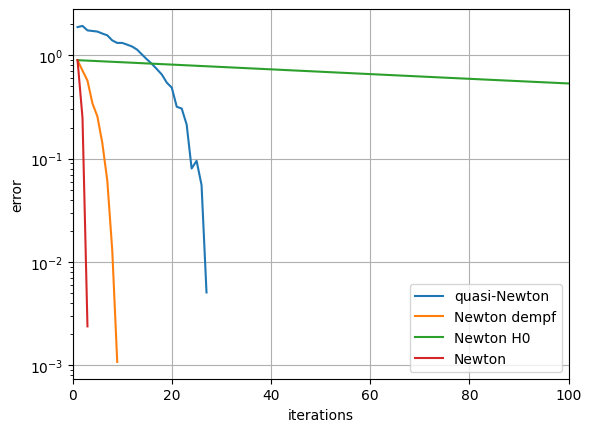

In [26]:
plt.semilogy(range(1, len(err_broyden) + 1), err_broyden, label = 'quasi-Newton')
plt.semilogy(range(1, len(err_newton_dempf) + 1), err_newton_dempf, label = 'Newton dempf')
plt.semilogy(range(1, len(err_newton_h0) + 1), err_newton_h0, label = 'Newton H0')
plt.semilogy(range(1, len(err_newton) + 1), err_newton, label = 'Newton')
plt.xlabel('iterations')
plt.ylabel('error')
plt.legend()
plt.xlim(0, 100)
plt.grid(True)